## Public Midjourney Prompt Data 
---
- This project is taking a look at Midjourney prompt data from October 24, 2023 - November 9, 2023

- Of note, this data contains prompts only from the Midjourney Discord itself, and whatever public facing channels the bot or bots that scrapped the information had access to at the time.

- It does not include prompts that were rejected by the AI filter or prompts that were caught in errors.

- 24,487 users generated 973,134 public facing prompts over 15 days. Data from 10/31 and 11/7 are completely missing. 10/24 only has 12 recorded prompts while 11/1 only has 5.

## Noted Service Outages or Issues
---

- 10/25: "/describe as well as jobs with image prompts hosted on the Discord CDN are failing. We're working with Discord on resolving the issue"
- 10/28: "Global Queue Reset
There was a momentary issue with the bot that left a lot of queues stuck. We are performing a global queue reset to fix this."
- 10/29: "There was an issue just now where jobs with image prompts would fail to run. This issue should now be resolved."



In [67]:
import pyarrow.parquet as pa
import pandas as pd
from ipywidgets import AppLayout, GridspecLayout, Button, Layout
import matplotlib.pyplot as plt

In [25]:
table = pa.read_table("Midjourney2023_Upscale.parquet")

In [26]:
table

pyarrow.Table
prompt: string
user: string
timestamp: timestamp[ns, tz=UTC]
image_url: string
----
prompt: [["a30 year old Australian male in a bold grey top, no filter, at a laptop in a professional marketing agency setting with pale orange accents, editorial style photo","a30 year old Australian male in a bold grey top, no filter, at a laptop in a professional marketing agency setting with pale orange accents, editorial style photo","a30 year old Australian male in a bold grey top, no filter, at a laptop in a professional marketing agency setting with pale orange accents, editorial style photo","a30 year old Australian male in a bold grey top, no filter, at a laptop in a professional marketing agency setting with pale orange accents, editorial style photo","a millennial Australian male in a bold grey top, no filter, at a laptop in an agency setting with soft red accents, editorial style photo",...,"Dissociative personality disorder, Korean woman raw   ","Dissociative personality disor

In [27]:
table.shape

(973134, 4)

**973,134 prompts** over 16 days.

In [28]:
df = table.to_pandas()  
df.head().T

,0,1,2,3,4
prompt,a30 year old Australian male in a bold grey to...,a30 year old Australian male in a bold grey to...,a30 year old Australian male in a bold grey to...,a30 year old Australian male in a bold grey to...,a millennial Australian male in a bold grey to...
user,838569662941102110,838569662941102110,838569662941102110,838569662941102110,838569662941102110
timestamp,2023-11-04 08:05:34.078000+00:00,2023-11-04 08:05:26.130000+00:00,2023-11-04 08:05:24.309000+00:00,2023-11-04 08:05:21.934000+00:00,2023-11-04 08:04:54.067000+00:00
image_url,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...


In [29]:
df.dtypes

prompt                    object
user                      object
timestamp    datetime64[ns, UTC]
image_url                 object
dtype: object

In [30]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
first_timestamp = df["timestamp"].min()
last_timestamp = df["timestamp"].max()
print(f"First timestamp: {first_timestamp}")
print(f"Last timestamp: {last_timestamp}")

First timestamp: 2023-10-24 03:56:41.108000+00:00
Last timestamp: 2023-11-09 03:33:57.146000+00:00


## Prompt Data
---

In [31]:
#This counts characters, not words. Oop.
df["promptLength"] = df["prompt"].str.len()
df["promptLength"].describe()

count    973134.000000
mean        177.577442
std         206.590229
min           1.000000
25%          67.000000
50%         118.000000
75%         208.000000
max        1800.000000
Name: promptLength, dtype: float64

In [32]:
#Intended to count words per prompt, misunderstood what code was doing. 
#From https://stackoverflow.com/questions/37483470/how-to-calculate-number-of-words-in-a-string-in-dataframe

df["wordCount"] = df["prompt"].str.split().apply(len).value_counts()
df["wordCount"].describe()

count      310.000000
mean      3139.141935
std       7509.070470
min          1.000000
25%         49.000000
50%        164.500000
75%       1120.000000
max      35530.000000
Name: wordCount, dtype: float64

In [33]:
#Actually counting words per prompt
df["word_count"] = df["prompt"].str.split().str.len()
df["word_count"].describe()

count    973134.000000
mean         25.990573
std          29.710369
min           1.000000
25%          10.000000
50%          18.000000
75%          31.000000
max         377.000000
Name: word_count, dtype: float64

**Minimum word count**: 1
**Max word count**: 377 

In [34]:
df["prompt"][1346]

'(photorealistic) (masterpiece) Anime style. Scene from an anime movie. Shinichi Aizawa, a 20 year-old male student with slightly unruly black hair and blue eyes wearing a black tee-shirt, blue jeans and brown shoes.sitting back on the ground. He is facing a single talking red fox that is sitting in front of him. He looks panickedat being addressed by the animal. They are surrounded by high golden grain. Blue sky with streaky pink and white clouds. In the style of Don Bluth.  --niji'

In [35]:
containsNiji = df["prompt"].str.contains("niji", case=False, na=False)
filteredForNiji = df[containsNiji] 

In [13]:
#How many prompts are (correctly) using parameters? Aspect ratio, chaos, no, style, weird
#How many prompts are incorrectly trying to use parameters? ie, no -- 
#How many prompts are using older versions? --niji 4, --niji 6, --version/--v <1, 2, 3, 4, 5, 5.1, 5.2> 

In [36]:
print(filteredForNiji)

                                                   prompt                user  \
694     niji 5, Halloween, monsters, tattoo design, si...  878376022184169524   
1151    a male human angel with wings made of golden l...  353023489541931009   
1156    a male human angel with wings made of golden l...  353023489541931009   
1157    a male human angel with wings made of golden l...  353023489541931009   
1346    (photorealistic) (masterpiece) Anime style. Sc...  726804658579963946   
...                                                   ...                 ...   
971042  (msterpiece) (highly detailed) a teenage detec...  726804658579963946   
971051  (masterpiece) Full figures visible. Dynamic po...  726804658579963946   
971052  (masterpiece) Full figures visible. Dynamic po...  726804658579963946   
971053  (masterpiece) Full figures visible. Dynamic po...  726804658579963946   
971054  (masterpiece) Full figures visible. Dynamic po...  726804658579963946   

                           

---
Need to remember to be mindful of the columns I'm adding...

In [15]:
#Any correlation between prompt length and reuse?
#Languages?

In [16]:
#How many prompts are repeated without changes?
#How many prompts are repeated with only parameter changes?
#How many prompts are repeated with only a single word change? (this could be tricky with determining the addition of, subtraction of, etc)

## User Data
---

In [17]:
uniqueUsers = df["user"].nunique()
uniqueUsers

24487

In [18]:
#How many users posted everyday? 
#Unique users per day?

In [19]:
promptsPerUser = df["user"].value_counts()
promptsPerUser

user
1133120398163193937    8666
1142211736116662343    7327
140316570487488512     6868
1017944538330959934    4200
598593981537976372     4133
                       ... 
971143636362358835        1
1079337279329407026       1
1092071164161048717       1
1064717812700028938       1
1124031946381611079       1
Name: count, Length: 24487, dtype: int64

In [20]:
#How many users are using the same prompt that another user prompted?

In [21]:
#Look at how many users only posted 1 time

In [38]:
df.head().T

,0,1,2,3,4
prompt,a30 year old Australian male in a bold grey to...,a30 year old Australian male in a bold grey to...,a30 year old Australian male in a bold grey to...,a30 year old Australian male in a bold grey to...,a millennial Australian male in a bold grey to...
user,838569662941102110,838569662941102110,838569662941102110,838569662941102110,838569662941102110
timestamp,2023-11-04 08:05:34.078000+00:00,2023-11-04 08:05:26.130000+00:00,2023-11-04 08:05:24.309000+00:00,2023-11-04 08:05:21.934000+00:00,2023-11-04 08:04:54.067000+00:00
image_url,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...,https://cdn.discordapp.com/attachments/9954314...
promptLength,162,162,162,162,137
wordCount,NaN,4351.0,25012.0,22279.0,25620.0
word_count,28,28,28,28,25


## Time Data
---

In [22]:
#How many prompts per day?
#Frequency over 24 hour period?
#I remember commentary from David (the founder of Midjourney) about Niji render times shooting up at certain times due to that being around 
#when a lot of folks in Japan started about their day / evenings or some such. I wonder if that can be seen in this data.

In [52]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values(by="timestamp")

In [53]:
df["date"] = df["timestamp"].dt.date

In [49]:
dailyActivity = df.groupby(["user", "date"]).size().reset_index(name="counts")

In [50]:
dailyActivity

,user,date,counts
0,1000051693758718053,2023-10-27,5
1,1000059165928079523,2023-10-26,1
2,1000059165928079523,2023-10-27,1
3,1000095457097289780,2023-10-28,12
4,1000095457097289780,2023-11-08,4
...,...,...,...
47281,999925241939759134,2023-10-30,12
47282,999925241939759134,2023-11-04,8
47283,999965352928751627,2023-11-06,4
47284,999966655985754122,2023-11-02,2


In [48]:
totalDays = df["date"].nunique()
totalDays

15

In [74]:
dailyPrompts = df.groupby("date").size()
dailyPrompts
#Hey... Some dates are missing. 10/31, 11/7
#Should also check to see what time ranges the prompts run each day

date
2023-10-24       12
2023-10-25    60554
2023-10-26    88514
2023-10-27    87925
2023-10-28    93805
2023-10-29    94630
2023-10-30    41924
2023-11-01        5
2023-11-02    82922
2023-11-03    86052
2023-11-04    90539
2023-11-05    87973
2023-11-06    62357
2023-11-08    83122
2023-11-09    12800
dtype: int64

In [75]:
#Making sure total number of prompts matches original number in the event my numbers got wonky somewhere..
checkTotal = dailyPrompts.sum()
checkTotal

973134

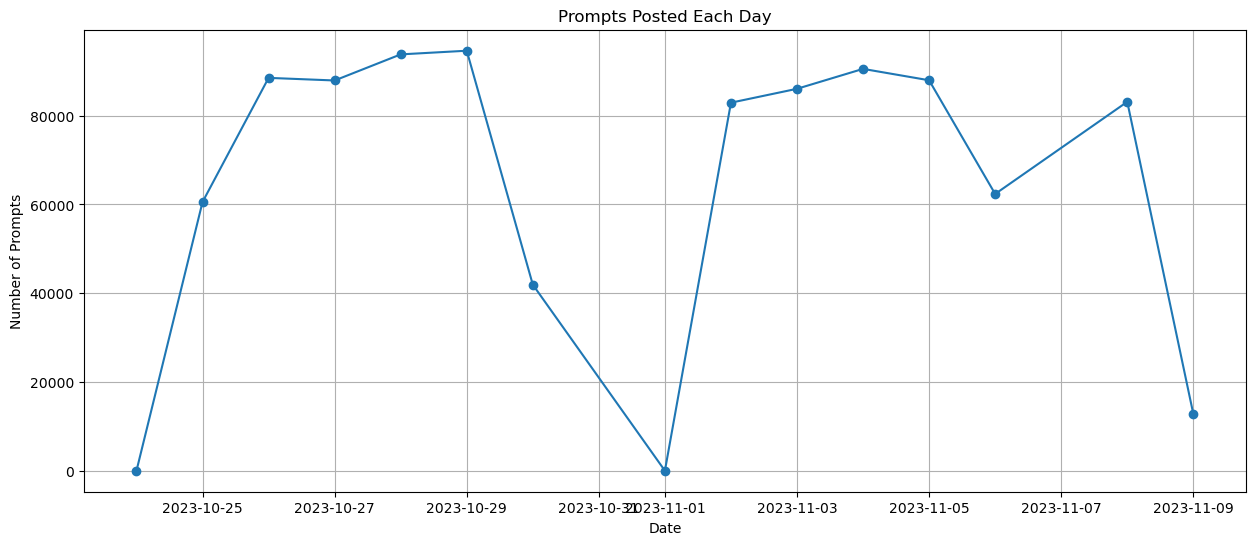

In [73]:
plt.figure(figsize=(15, 6))
dailyPrompts.plot(kind="line", marker="o", linestyle="-")
plt.title("Prompts Posted Each Day")
plt.xlabel("Date")
plt.ylabel("Number of Prompts")
plt.grid(True)
plt.show()

#This graph basically shows what can already be figured out by the dailyPrompts data directly. 'Hey! There's bad data collection!'
#Though it is interesting that there's still a noted uptick and noted downtick (respectively). I wonder if that corresponds with api outages or if it's
#a coincidence.

In [ ]:
#Remove bad data days here.
#New graph.

In [76]:
userActiveDays = dailyActivity.groupby("user")["date"].nunique()
userActiveDays
#Redo user activity with clean data.

user
1000051693758718053    1
1000059165928079523    2
1000095457097289780    2
1000142097837457519    4
1000242258370633740    1
                      ..
999895176619237436     5
999925241939759134     4
999965352928751627     1
999966655985754122     1
999980663753150564     1
Name: date, Length: 24487, dtype: int64

**How many users prompted everyday?**

In [47]:
#When there's a day with only 5 prompts, ofc there's going to be 0 users prompting every day.

activeEveryDayUsers = userActiveDays[userActiveDays == totalDays]
countUsersActiveEveryDay = activeEveryDayUsers.count()
countUsersActiveEveryDay

0

## Visuals
---

In [87]:
#Just faffing about with using simple usuals to display the bigger data points.
#These styles should be applying but they're not and that's weird.

header1 = create_expanded_button('Midjourney Prompts', 'success')
header1.style.font_size = "24"
header1.style.font_style = "bold"

left_button = create_expanded_button(f"Unique Users: {uniqueUsers}", 'info')
center_button = create_expanded_button(f"Total Prompts: {checkTotal}", 'warning')
right_button = create_expanded_button('Right', 'info')
footer_button = create_expanded_button('Footer', 'success')

AppLayout(header=header1,
          left_sidebar=left_button,
          center=center_button,
          right_sidebar=right_button,
          footer=None)

AppLayout(children=(Button(button_style='success', description='Midjourney Prompts', layout=Layout(grid_area='…

In [23]:
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))
    

grid = GridspecLayout(4, 3, height='300px')
grid[:3, 1:] = create_expanded_button('Word Cloud', 'info')
grid[:, 0] = create_expanded_button('Stats', 'info')
grid[3, 1] = create_expanded_button('Drop Down 1 - Day', 'info')
grid[3, 2] = create_expanded_button('Slider', 'info')

grid

#

GridspecLayout(children=(Button(button_style='info', description='Word Cloud', layout=Layout(grid_area='widget…

## NLP???
---

Allegedly [Textblob](https://textblob.readthedocs.io/en/dev/index.html) is a decent beginner natural language processor. I keep seeing NLPs pop up anytime I search for information related to text analysis.